# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
#Dependencies 
import json
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from config import api_key
from citipy import citipy
from datetime import datetime # to convert unix time to date time


url = "http://api.openweathermap.org/data/2.5/weather?q="

longitude = (-180, 180) #upon doing some research, had a quick lesson on longitude and latitude
latitude = (-90, 90)


## Generate Cities List

In [12]:
coordinantes = []
cityname = []

long = np.random.uniform(size = 2000, low = -180.00, high = 180.00)
lati = np.random.uniform(size = 2000, low = -09.00, high = 90.00)
coordinates = zip(lati, long) #join the 2 tuples together to form the coordinance

       
for coord in coordinates:
        city = citipy.nearest_city(coord[0], coord[1]).city_name 
        # using imported citipy's function with randomly generated coordinates to get city names 

        if city not in cityname: #some cities would be repeated in an area, if statement in place to avoid redundancies
            cityname.append(city) 
            #print(city) to have a look at te city list.

print (f' There are a total of {len(cityname)} cities from the sample')

 There are a total of 896 cities from the sample


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
#creating several blank lists to hold data
temperature =[]
humidity = []
cloudiness = []
wind_speed = []
queried_city = [] # to verify when the city data is in openweathermap
cityid= []
country = []
longi = [] #another longitude list to get exact longitude from openweathermap
latit = [] #similarly to the purpose of longi
date = [] #to get weather data on the same date
limiter = 0
process_group = 1
i = 0
units = "imperial" #set to imperial as faherenheit and mph required
query_url = f"&appid={api_key}&units={units}"


# To look at the structure of the data
# cities = 'kuala lumpur'
# weather_response = weather_response = requests.get(url+cities.replace(" ", "+")+query_url).json()
# weather_response

for cities in cityname:
    try:
        weather_response = requests.get(url+cities.replace(" ", "+")+query_url).json() #replacing space with + 
        temperature.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        cityid.append(weather_response['id'])
        longi.append(weather_response['coord']['lon'])
        latit.append(weather_response['coord']['lat'])
        date.append(weather_response['dt'])
        if limiter > 50: #as free API key, only has limit of 60 calls per minute
            limiter = 1
            process_group += 1
            queried_city.append(cities)
        else:
            limiter +=1
            queried_city.append(cities)
        print(f"Processed {limiter} in group {process_group} for City ID: {cityid[i]} | {cities}")
        i += 1
    except :
        print(f'{cities} not found in Openweathermap.org')
        
print(f'--API Retrieval Completed--')

Processed 1 in group 1 for City ID: 4031637 | lavrentiya
Processed 2 in group 1 for City ID: 5855927 | hilo
Processed 3 in group 1 for City ID: 2015913 | suntar
hunza not found in Openweathermap.org
samusu not found in Openweathermap.org
Processed 4 in group 1 for City ID: 5354943 | half moon bay
Processed 5 in group 1 for City ID: 3608248 | la ceiba
Processed 6 in group 1 for City ID: 2122262 | palana
belushya guba not found in Openweathermap.org
Processed 7 in group 1 for City ID: 2126199 | cherskiy
Processed 8 in group 1 for City ID: 3831208 | qaanaaq
Processed 9 in group 1 for City ID: 2729907 | longyearbyen
Processed 10 in group 1 for City ID: 2126123 | chokurdakh
Processed 11 in group 1 for City ID: 3080165 | zielona gora
Processed 12 in group 1 for City ID: 3670357 | saldana
Processed 13 in group 1 for City ID: 1486321 | yar-sale
Processed 14 in group 1 for City ID: 2017155 | saskylakh
Processed 15 in group 1 for City ID: 1168312 | pasni
Processed 16 in group 1 for City ID: 3517

Processed 31 in group 3 for City ID: 2094342 | kavieng
Processed 32 in group 3 for City ID: 1508894 | borovoy
Processed 33 in group 3 for City ID: 2270385 | camacha
Processed 34 in group 3 for City ID: 2264557 | ponta do sol
Processed 35 in group 3 for City ID: 6170031 | tuktoyaktuk
Processed 36 in group 3 for City ID: 3146487 | raudeberg
Processed 37 in group 3 for City ID: 4726521 | san patricio
Processed 38 in group 3 for City ID: 3512067 | bani
Processed 39 in group 3 for City ID: 2120591 | tilichiki
Processed 40 in group 3 for City ID: 286245 | sur
Processed 41 in group 3 for City ID: 2084442 | vanimo
Processed 42 in group 3 for City ID: 1510689 | baykit
Processed 43 in group 3 for City ID: 4031574 | provideniya
Processed 44 in group 3 for City ID: 2013216 | vysokogornyy
Processed 45 in group 3 for City ID: 2276492 | harper
Processed 46 in group 3 for City ID: 2123628 | magadan
Processed 47 in group 3 for City ID: 57000 | hobyo
Processed 48 in group 3 for City ID: 6089245 | norman

Processed 21 in group 6 for City ID: 1628884 | sampit
phan rang not found in Openweathermap.org
Processed 22 in group 6 for City ID: 2126682 | bilibino
Processed 23 in group 6 for City ID: 4566022 | loiza
Processed 24 in group 6 for City ID: 164947 | salamiyah
Processed 25 in group 6 for City ID: 778707 | mehamn
Processed 26 in group 6 for City ID: 86049 | jalu
Processed 27 in group 6 for City ID: 1504382 | kargasok
Processed 28 in group 6 for City ID: 1567681 | son la
Processed 29 in group 6 for City ID: 2122389 | ossora
garm not found in Openweathermap.org
Processed 30 in group 6 for City ID: 1788852 | xining
Processed 31 in group 6 for City ID: 1215350 | bireun
Processed 32 in group 6 for City ID: 1525988 | ayagoz
Processed 33 in group 6 for City ID: 216281 | goma
Processed 34 in group 6 for City ID: 3188763 | trogir
Processed 35 in group 6 for City ID: 795243 | snezhnogorsk
Processed 36 in group 6 for City ID: 5972762 | hay river
Processed 37 in group 6 for City ID: 1283240 | kathm

karaul not found in Openweathermap.org
Processed 5 in group 9 for City ID: 2028164 | deputatskiy
Processed 6 in group 9 for City ID: 3013633 | havre
Processed 7 in group 9 for City ID: 5859699 | college
Processed 8 in group 9 for City ID: 3038333 | ajaccio
mizpe ramon not found in Openweathermap.org
saleaula not found in Openweathermap.org
Processed 9 in group 9 for City ID: 5364022 | la palma
Processed 10 in group 9 for City ID: 4440397 | pascagoula
Processed 11 in group 9 for City ID: 3414079 | olafsvik
Processed 12 in group 9 for City ID: 1258294 | raxaul
Processed 13 in group 9 for City ID: 3115824 | muros
Processed 14 in group 9 for City ID: 779622 | havoysund
Processed 15 in group 9 for City ID: 3374210 | sao filipe
Processed 16 in group 9 for City ID: 72181 | marzuq
Processed 17 in group 9 for City ID: 5870133 | nome
mogochin not found in Openweathermap.org
Processed 18 in group 9 for City ID: 1526041 | atasu
Processed 19 in group 9 for City ID: 5797693 | hoquiam
Processed 20 in

Processed 41 in group 11 for City ID: 1293625 | dawei
Processed 42 in group 11 for City ID: 2512186 | puerto del rosario
Processed 43 in group 11 for City ID: 3131500 | visnes
Processed 44 in group 11 for City ID: 2542997 | marrakesh
Processed 45 in group 11 for City ID: 1512218 | aban
Processed 46 in group 11 for City ID: 2977921 | saint-nazaire
Processed 47 in group 11 for City ID: 691639 | ternuvate
Processed 48 in group 11 for City ID: 3662395 | santo antonio do ica
Processed 49 in group 11 for City ID: 1214488 | meulaboh
Processed 50 in group 11 for City ID: 1626542 | sorong
Processed 51 in group 11 for City ID: 2613731 | skive
Processed 1 in group 12 for City ID: 1494482 | polunochnoye
Processed 2 in group 12 for City ID: 1803567 | linfen
Processed 3 in group 12 for City ID: 143073 | ardakan
Processed 4 in group 12 for City ID: 3421319 | nuuk
Processed 5 in group 12 for City ID: 1263942 | manavalakurichi
Processed 6 in group 12 for City ID: 1276574 | bela
Processed 7 in group 12 

Processed 27 in group 14 for City ID: 3728097 | les cayes
Processed 28 in group 14 for City ID: 2412408 | nioro
Processed 29 in group 14 for City ID: 3571913 | marsh harbour
Processed 30 in group 14 for City ID: 1259395 | porbandar
Processed 31 in group 14 for City ID: 1735106 | george town
Processed 32 in group 14 for City ID: 70979 | sayyan
Processed 33 in group 14 for City ID: 1786538 | yining
Processed 34 in group 14 for City ID: 1728675 | balabac
Processed 35 in group 14 for City ID: 1279027 | alibag
Processed 36 in group 14 for City ID: 1272140 | dwarka
Processed 37 in group 14 for City ID: 3693345 | pucallpa
Processed 38 in group 14 for City ID: 3118304 | llanes
Processed 39 in group 14 for City ID: 6144312 | sept-iles
Processed 40 in group 14 for City ID: 218229 | bongandanga
Processed 41 in group 14 for City ID: 1899102 | nagato
Processed 42 in group 14 for City ID: 174782 | shaghat
Processed 43 in group 14 for City ID: 1213855 | sibolga
Processed 44 in group 14 for City ID: 5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
readable_date = [] #watches would be so confusing if time is told via Unix Time, this is to convert to readable time
for dates in date: 
     readable_date.append(datetime.fromtimestamp(dates))
    

compiled_data = {'City Name': queried_city, 'Country': country, 'Date': readable_date, 'Latitude': latit, 'Longitude': longi,
                'Temperature(F)': temperature, 'Humidity(%)': humidity, 'Cloudiness(%)':cloudiness, 'Wind Speed(mph)': wind_speed}
weather_data = pd.DataFrame(compiled_data)

# Output File (CSV)
weather_data.to_csv('Output\weather_data.csv',index = False, header=True)
                                    

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
#  Get the indices of cities that have humidity over 100%.
over_humid = (weather_data['Humidity(%)'] > 100).value_counts()
over_humid
#There are no cities with over 100% humidity

False    820
Name: Humidity(%), dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

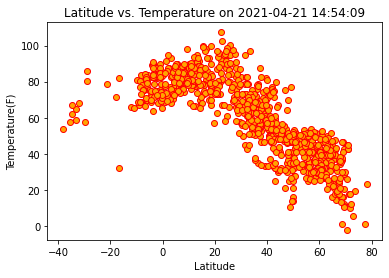

In [30]:
plt.scatter(weather_data['Latitude'], weather_data['Temperature(F)'], color='orange', edgecolors="red")
plt.title(f'Latitude vs. Temperature on {weather_data.iloc[0,2]}')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.savefig("output/lat_vs_temp.png")


As 0 Latitude is where the Earth's equator is, it made sense that the further away from 0 Latitude and reduce in temperature as it moves away from  0.

## Latitude vs. Humidity Plot

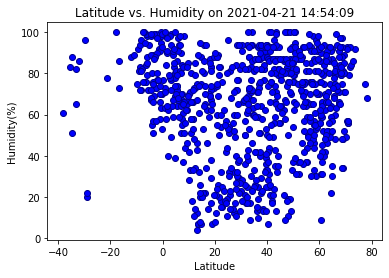

In [31]:
plt.scatter(weather_data['Latitude'], weather_data['Humidity(%)'], color='blue', edgecolors="darkblue")
plt.title(f'Latitude vs. Humidity on {weather_data.iloc[0,2]}')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.savefig("output/lat_vs_hum.png")

At first sight, it may seem like data points are everywhere. In fact, clusters can be noticed at 0 latitude, and between 60 to 80. 

## Latitude vs. Cloudiness Plot

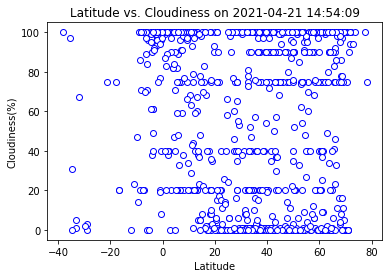

In [32]:
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness(%)'], color='white', edgecolors="blue")
plt.title(f'Latitude vs. Cloudiness on {weather_data.iloc[0,2]}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig("output/lat_vs_cloud.png")

Data points are congregated on both the top and bottom of the scatter plot.  

## Latitude vs. Wind Speed Plot

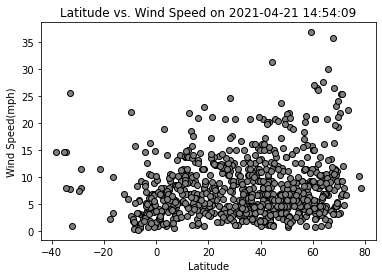

In [33]:
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed(mph)'], color='gray', edgecolors="black")
plt.title(f'Latitude vs. Wind Speed on {weather_data.iloc[0,2]}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.savefig("output/lat_vs_wind.png")

On the Latitude vs. Wind Speed, data points are gravitated below 15 MPH on most Latitude degrees

## Linear Regression

In [34]:
northhems = weather_data[weather_data['Latitude'] >= 0]
northhems.reset_index(drop=True)

southhems = weather_data[weather_data['Latitude'] < 0]
southhems.reset_index(drop=True)

print(f'Total Cities: {len(weather_data)}\nTotal Cities in the Northern Hemisphere: {len(northhems)} \nTotal Cities in the Southern Hemisphere:{len(southhems)}')

Total Cities: 820
Total Cities in the Northern Hemisphere: 736 
Total Cities in the Southern Hemisphere:84


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.85


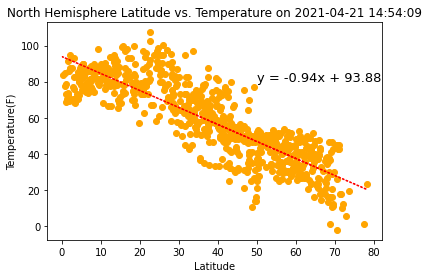

In [36]:
#North Hemisphere Max Temp vs. Latitude Linear Regression as nhtvllr

nhtvllr_correlation = sts.pearsonr(northhems['Latitude'],northhems['Temperature(F)'])
print(f'The correlation between both factors is {round(nhtvllr_correlation[0],2)}')

nhtvllr_slope, nhtvllr_int, nhtvllr_r, nhtvllr_p, nhtvllr_std_err = sts.linregress(northhems['Latitude'],northhems['Temperature(F)'])
nhtvllr_fit = nhtvllr_slope * northhems['Latitude'] + nhtvllr_int

plt.scatter(northhems['Latitude'],northhems['Temperature(F)'], color='orange', )
plt.title(f'North Hemisphere Latitude vs. Temperature on {weather_data.iloc[0,2]}')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')

line_equation = f'y = {str(round(nhtvllr_slope,2))}x + {str(round(nhtvllr_int,2))}'
plt.annotate(line_equation,(50,80),fontsize=13,color='black')
plt.plot(northhems['Latitude'],nhtvllr_fit,':r')
plt.savefig("output/northlat_vs_temp.png")

With the R value of -0.85, the relationship between the Northern Hemisphere Latitude and Temperature has a high negative correlation. Temperature lowers as it moves away from 0.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.47


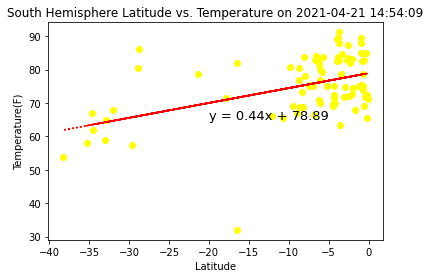

In [39]:
#South Hemisphere Max Temp vs. Latitude Linear Regression as shtvllr

shtvllr_correlation = sts.pearsonr(southhems['Latitude'],southhems['Temperature(F)'])
print(f'The correlation between both factors is {round(shtvllr_correlation[0],2)}')

shtvllr_slope, shtvllr_int, shtvllr_r, shtvllr_p, shtvllr_std_err = sts.linregress(southhems['Latitude'],southhems['Temperature(F)'])
shtvllr_fit = shtvllr_slope * southhems['Latitude'] + shtvllr_int

plt.scatter(southhems['Latitude'],southhems['Temperature(F)'], color='yellow', )
plt.title(f'South Hemisphere Latitude vs. Temperature on {weather_data.iloc[0,2]}')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')

line_equation = f'y = {str(round(shtvllr_slope,2))}x + {str(round(shtvllr_int,2))}'
plt.annotate(line_equation,(-20,65),fontsize=13,color='black')
plt.plot(southhems['Latitude'],shtvllr_fit,':r')
plt.savefig("output/southlat_vs_temp.png")

Moving down South to the Southern Hemisphere, the relationship has a low positive correlation (0.47) where data points are more concentrated towards 0.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.13


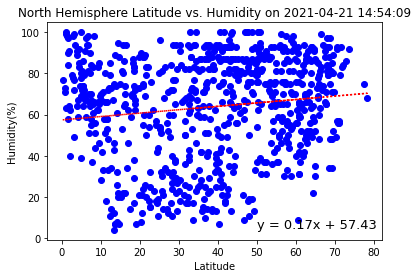

In [41]:
#North Hemisphere Humidity vs Latitude Linear Regression as nhhvllr

nhhvllr_correlation = sts.pearsonr(northhems['Latitude'],northhems['Humidity(%)'])
print(f'The correlation between both factors is {round(nhhvllr_correlation[0],2)}')

nhhvllr_slope, nhhvllr_int, nhhvllr_r, nhhvllr_p, nhhvllr_std_err = sts.linregress(northhems['Latitude'],northhems['Humidity(%)'])
nhhvllr_fit = nhhvllr_slope * northhems['Latitude'] + nhhvllr_int

plt.scatter(northhems['Latitude'],northhems['Humidity(%)'], color='blue', )
plt.title(f'North Hemisphere Latitude vs. Humidity on {weather_data.iloc[0,2]}')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

line_equation = f'y = {str(round(nhhvllr_slope,2))}x + {str(round(nhhvllr_int,2))}'
plt.annotate(line_equation,(50,5),fontsize=13,color='black')
plt.plot(northhems['Latitude'],nhhvllr_fit,':r')
plt.savefig("output/northlat_vs_humi.png")

This has a negligible correlation. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.23


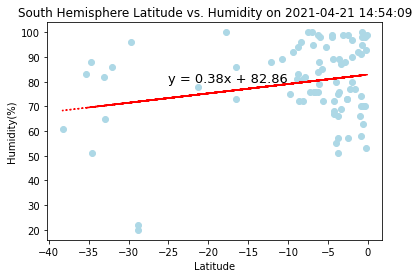

In [42]:
#South Hemisphere Humidity vs Latitude Linear Regression as shhvllr

shhvllr_correlation = sts.pearsonr(southhems['Latitude'],southhems['Humidity(%)'])
print(f'The correlation between both factors is {round(shhvllr_correlation[0],2)}')

shhvllr_slope, shhvllr_int, shhvllr_r, shhvllr_p, shhvllr_std_err = sts.linregress(southhems['Latitude'],southhems['Humidity(%)'])
shhvllr_fit = shhvllr_slope * southhems['Latitude'] + shhvllr_int

plt.scatter(southhems['Latitude'],southhems['Humidity(%)'], color='lightblue', )
plt.title(f'South Hemisphere Latitude vs. Humidity on {weather_data.iloc[0,2]}')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

line_equation = f'y = {str(round(shhvllr_slope,2))}x + {str(round(shhvllr_int,2))}'
plt.annotate(line_equation,(-25,80),fontsize=13,color='black')
plt.plot(southhems['Latitude'],shhvllr_fit,':r')
plt.savefig("output/southlat_vs_humi.png")

Similarly with the Northern Hemisphere, the South Hemisphere latitudes also have a very low correlation between latitudes and Humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.02


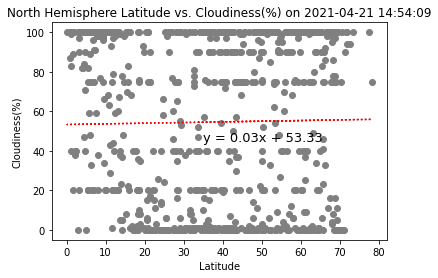

In [43]:
#North Hemisphere Cloudiness vs. Latitude Linear Regression as nhcvllr

nhcvllr_correlation = sts.pearsonr(northhems['Latitude'],northhems['Cloudiness(%)'])
print(f'The correlation between both factors is {round(nhcvllr_correlation[0],2)}')

nhcvllr_slope, nhcvllr_int, nhcvllr_r, nhcvllr_p, nhcvllr_std_err = sts.linregress(northhems['Latitude'],northhems['Cloudiness(%)'])
nhcvllr_fit = nhcvllr_slope * northhems['Latitude'] + nhcvllr_int

plt.scatter(northhems['Latitude'],northhems['Cloudiness(%)'], color='gray', )
plt.title(f'North Hemisphere Latitude vs. Cloudiness(%) on {weather_data.iloc[0,2]}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

line_equation = f'y = {str(round(nhcvllr_slope,2))}x + {str(round(nhcvllr_int,2))}'
plt.annotate(line_equation,(35,45),fontsize=13,color='black')
plt.plot(northhems['Latitude'],nhcvllr_fit,':r')
plt.savefig("output/northlat_vs_cloudy.png")

Weak relationship observed with Northern Hemisphere latitudes and cloudiness

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.44


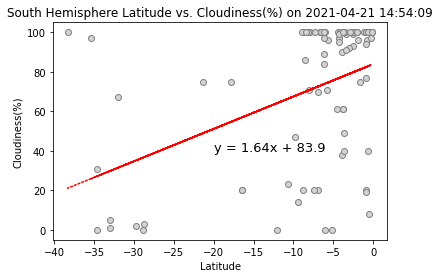

In [44]:
#South Hemisphere Cloudiness vs. Latitude Linear Regression as shcvllr

shcvllr_correlation = sts.pearsonr(southhems['Latitude'],southhems['Cloudiness(%)'])
print(f'The correlation between both factors is {round(shcvllr_correlation[0],2)}')

shcvllr_slope, shcvllr_int, shcvllr_r, shcvllr_p, shcvllr_std_err = sts.linregress(southhems['Latitude'],southhems['Cloudiness(%)'])
shcvllr_fit = shcvllr_slope * southhems['Latitude'] + shcvllr_int

plt.scatter(southhems['Latitude'],southhems['Cloudiness(%)'], color='lightgray',edgecolors='gray' )
plt.title(f'South Hemisphere Latitude vs. Cloudiness(%) on {weather_data.iloc[0,2]}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

line_equation = f'y = {str(round(shcvllr_slope,2))}x + {str(round(shcvllr_int,2))}'
plt.annotate(line_equation,(-20,40),fontsize=13,color='black')
plt.plot(southhems['Latitude'],shcvllr_fit,':r')
plt.savefig("output/southlat_vs_cloudy.png")

On the other hand, the Southern Hemisphere has a stronger relationship compared to the North when it comes to Latitudes and cloudiness, there is an almost moderate correlation (0.41)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.14


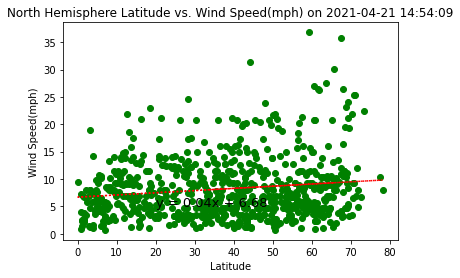

In [45]:
#North Hemisphere Wind Speed vs. Latitude Linear Regression as nhwvllr

nhwvllr_correlation = sts.pearsonr(northhems['Latitude'],northhems['Wind Speed(mph)'])
print(f'The correlation between both factors is {round(nhwvllr_correlation[0],2)}')

nhwvllr_slope, nhwvllr_int, nhwvllr_r, nhwvllr_p, nhwvllr_std_err = sts.linregress(northhems['Latitude'],northhems['Wind Speed(mph)'])
nhwvllr_fit = nhwvllr_slope * northhems['Latitude'] + nhwvllr_int

plt.scatter(northhems['Latitude'],northhems['Wind Speed(mph)'], color='green')
plt.title(f'North Hemisphere Latitude vs. Wind Speed(mph) on {weather_data.iloc[0,2]}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')

line_equation = f'y = {str(round(nhwvllr_slope,2))}x + {str(round(nhwvllr_int,2))}'
plt.annotate(line_equation,(20,5),fontsize=13,color='black')
plt.plot(northhems['Latitude'],nhwvllr_fit,':r')
plt.savefig("output/northlat_vs_winds.png")

The relationship between both factors is highly neglibile. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.38


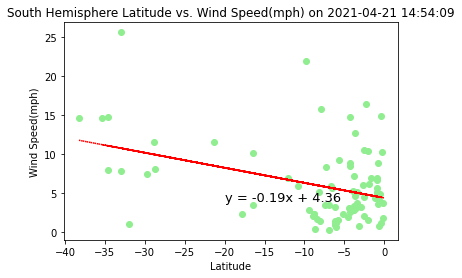

In [46]:
#South Hemisphere Wind Speed vs. Latitude Linear Regression as shwvllr

shwvllr_correlation = sts.pearsonr(southhems['Latitude'],southhems['Wind Speed(mph)'])
print(f'The correlation between both factors is {round(shwvllr_correlation[0],2)}')

shwvllr_slope, shwvllr_int, shwvllr_r, shwvllr_p, shwvllr_std_err = sts.linregress(southhems['Latitude'],southhems['Wind Speed(mph)'])
shwvllr_fit = shwvllr_slope * southhems['Latitude'] + shwvllr_int

plt.scatter(southhems['Latitude'],southhems['Wind Speed(mph)'], color='lightgreen')
plt.title(f'South Hemisphere Latitude vs. Wind Speed(mph) on {weather_data.iloc[0,2]}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')

line_equation = f'y = {str(round(shwvllr_slope,2))}x + {str(round(shwvllr_int,2))}'
plt.annotate(line_equation,(-20,4),fontsize=13,color='black')
plt.plot(southhems['Latitude'],shwvllr_fit,':r')
plt.savefig("output/southlat_vs_winds.png")

Similarly to its Northern side, the Southern Hemisphere has a very weak negative relationship between Latitudes and Wind Speed. 

In conclusion, latitude and temperature has the highest correlation values as a high R value can be observed from the dataset, the others are weak to negligible, hence we can say that a temperature of the city is affected by its location's latitude. 